Done:
- ex
- dir 0
- dir 0 riganello
- dir 1 (lrn e bn ??)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import cv2
import torch.nn as nn
import torch

In [ ]:
img = Image.open('./planes.jpg').convert('L')
img = np.array(img,dtype=float)/255

In [ ]:
Image.

In [ ]:
img.shape

In [ ]:
nd.convolve(img,np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])).shape

In [ ]:
plt.imshow(nd.convolve(img,np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])),cmap='gray')


In [ ]:
plt.hist(img.reshape(-1))
plt.show()

In [ ]:
img_linear = np.clip(img*2,0,1)
plt.hist(img_linear.reshape(-1))
plt.show()

In [ ]:
gamma = 4
img_exp = np.clip(img**gamma,0,1)
plt.hist(img_exp.reshape(-1))
plt.show()

In [ ]:
import torch
conv1 = torch.nn.Conv2d(3, 32, kernel_size=(3, 5), padding=4, stride=2, dilation=1)
conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=2, stride=1)

model = lambda x: conv2(conv1(x))

model(torch.rand((1,3,200,10))).shape

In [ ]:
def compute_out_conv(I,k,d=1,p=0,s=1):
    tmp = (I-k-(k-1)*(d-1)+2*p)/s
    return np.floor(tmp)+1

In [ ]:
# 1x3x200x10

In [ ]:
x_1 = compute_out_conv(200,k=3,p=4,s=2,d=1)
x_2 = compute_out_conv(x_1,k=3,p=2,s=1)
x_2

In [ ]:
x_1 = compute_out_conv(10,k=5,p=4,s=2,d=1)
x_3 = compute_out_conv(x_1,k=3,p=2,s=1)
x_3

In [ ]:
# out = 1x64x105x9

In [ ]:
img = Image.open('./gradient.png').convert('L')
img = np.array(img,dtype=float)/255
tmp = img.copy()
k = 0.3
tmp[img>=k] = 1
tmp[img<k] = 0
img = tmp
plt.imshow(img,cmap='gray')

In [ ]:
def threshold(I,theta):
    ret = I.copy()
    ret[I>=theta] = 1
    ret[I<theta] = 0
    return ret
def dilation(I,F):
    S = nd.convolve(I,F)
    ret = threshold(S,1)
    return ret
def erosion(I,F):
    S = nd.convolve(I,F)
    k = sum(F.reshape(-1))
    ret = threshold(S,k)
    return ret
    

In [ ]:
cv2.

In [ ]:
l1 = 5
filter1 = np.ones((l1,l1))
tmp = cv2.dilate(cv2.erode(img,filter1),filter1)
plt.imshow(tmp,cmap='gray')

In [ ]:
img = Image.open('./victor.jpg').convert('L')
img = np.array(img,dtype=float)/255
sobel_v = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
sobel_h = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
laplacian = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

img_sobel_v = nd.convolve(img,sobel_v)
plt.imshow(img_sobel_v,cmap='gray')
plt.show()

img_sobel_h = nd.convolve(img,sobel_h)
plt.imshow(img_sobel_h,cmap='gray')
plt.show()

img_laplacian = nd.convolve(img,laplacian)
plt.imshow(img_laplacian,cmap='gray')
plt.show()


In [ ]:
img = Image.open('./victor.jpg').convert('L')
img = np.array(img,dtype=float)/255
img_np = img.copy()
# convert to tensor
img = torch.tensor(img,dtype=torch.float32).unsqueeze(0).unsqueeze(0)
img_new = torch.clamp(img+0.2,0,1)


In [ ]:

lrn = nn.LocalResponseNorm(1,alpha=1)
bn = nn.BatchNorm2d(1)

img_lrn = lrn(img).numpy()
img_bn = bn(img).detach().numpy()

print(np.mean(img_np))
print(np.std(img_np))
print('---')

print(np.mean(img_lrn))
print(np.std(img_lrn))

print('---')

print(np.round(np.mean(img_bn),2))
print(np.std(img_bn))

print('---')

plt.imshow(img_lrn[0,0],cmap='gray')


In [ ]:
lrn = nn.LocalResponseNorm(1,alpha=1)
bn = nn.BatchNorm2d(1)

img_lrn = lrn(img_new).numpy()
img_bn = bn(img_new).detach().numpy()

print(np.mean(img_np))
print(np.std(img_np))
print('---')

print(np.mean(img_lrn))
print(np.std(img_lrn))

print('---')

print(np.round(np.mean(img_bn),2))
print(np.std(img_bn))

print('---')

plt.imshow(img_lrn[0,0],cmap='gray')

(800, 640, 3, 1)

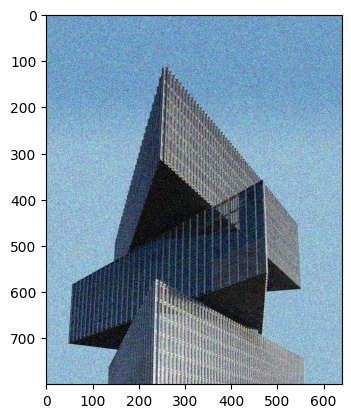

In [108]:
img = Image.open('./victor.jpg')
img = np.array(img,dtype=float)/255
img_orig = img.copy()
img = np.clip(img + np.random.normal(0,0.1,img.shape)*1.3,0,1)
# convert to grayscale using cv2
plt.imshow(img)
plt.show()

In [79]:
noise = sum(abs(img-img_orig).reshape(-1))
noise

153215.38676624838

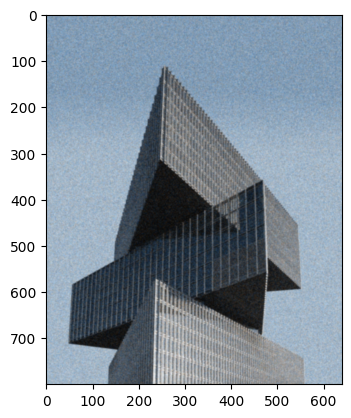

In [100]:
#img_mean = nd.convolve(img,mean_filter)
img_gauss = nd.gaussian_filter(img,sigma=1)

#plt.imshow(img_mean,cmap='gray')
#plt.show()

plt.imshow(img_gauss,cmap='gray')
plt.show()


In [101]:
sum(abs(img_gauss-img_orig).reshape(-1))


79714.59396903521

In [115]:
k = 100
mean_filter = np.ones((k,k,3))/(k**2*3)
img_mean = nd.convolve(img,mean_filter)
plt.imshow(img_mean,cmap='gray')
plt.show()
sum(abs(img_mean-img_orig).reshape(-1))